In [2]:
import oceanspy as ospy
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.colors import Normalize
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap

plt.rcParams.update({
    'font.size': 11,       # Default text size
    'axes.titlesize': 10,  # Title size
    'axes.labelsize': 10,  # Axis label size
    'xtick.labelsize': 8, # X-tick label size
    'ytick.labelsize': 8, # Y-tick label size
    'legend.fontsize': 8, # Legend font size
    'figure.titlesize': 10 # Figure title size
})

In [3]:
df = xr.open_dataset(r'/nird/projects/NS9608K/MSc_EK/Data/Background_var.nc').sel(time=['2018-02-01T00:00:00.000000000','2018-08-01T00:00:00.000000000'])
depth = xr.open_dataset(r'/nird/projects/NS9608K/MSc_EK/Data/Depth_res.nc')['Depth'].sel(Y=slice(65,79)).sel(X=slice(-30,10))
depth_notZero = depth
depth = depth.where(depth > 0, np.nan)

df2 = df.sel(X=slice(-22,5)).sel(Y=72.5, method='nearest')

od = ospy.OceanDataset(df2)
od = od.compute.potential_density_anomaly()
od.dataset

Computing potential density anomaly using the following parameters: {'eq_state': 'mdjwf'}.


<xarray.Dataset>
Dimensions:    (Z: 216, Zp1: 217, Zu: 216, Zl: 216, X: 558, Xp1: 766, Yp1: 629,
                time: 2, time_midp: 11)
Coordinates: (12/18)
  * Z          (Z) float64 -1.0 -3.5 -7.0 ... -3.904e+03 -3.922e+03 -3.942e+03
  * Zp1        (Zp1) float64 0.0 -2.0 -5.0 ... -3.913e+03 -3.932e+03 -3.951e+03
  * Zu         (Zu) float64 -2.0 -5.0 -9.0 ... -3.913e+03 -3.932e+03 -3.951e+03
  * Zl         (Zl) float64 0.0 -2.0 -5.0 ... -3.894e+03 -3.913e+03 -3.932e+03
  * X          (X) float64 -21.98 -21.93 -21.87 -21.82 ... 4.813 4.879 4.945
    Y          float64 72.5
    ...         ...
  * time       (time) datetime64[ns] 2018-02-01 2018-08-01
    YU         (Xp1) float64 ...
    XU         (Xp1) float64 ...
    YV         (Yp1, X) float64 ...
    XV         (Yp1, X) float64 ...
  * time_midp  (time_midp) datetime64[ns] 2017-09-16 ... 2018-07-16T12:00:00
Data variables:
    U          (time, Z, Xp1) float64 ...
    V          (time, Z, Yp1, X) float64 ...
    Temp       (time, Z, X) float64 ...
    S          (time, Z, X) float64 ...
    Eta        (time, X) float64 ...
    MXLDEPTH   (time, X) float64 ...
    SIarea     (time, X) float64 ...
    SIheff     (time, X) float64 ...
    Sigma0     (time, Z, X) float64 nan 25.48 25.49 25.51 ... nan nan nan nan
Attributes: (12/24)
    MITgcm_version:          checkpoint67l
    build_user:              malmans2@jhu.edu
    build_host:              compute0673
    build_date:              Fri Nov  8 01:36:45 EST 2019
    MITgcm_URL:              http://mitgcm.org
    MITgcm_tag_id:           
    ...                      ...
    OceanSpy_parameters:     {'rSphere': 6371.0, 'eq_state': 'mdjwf', 'rho0':...
    OceanSpy_name:           IGPyearlong
    OceanSpy_description:    High-resolution numerical simulation carried out...
    OceanSpy_projection:     Mercator(**{})
    OceanSpy_grid_coords:    {'Y': {'Y': None, 'Yp1': 0.5}, 'X': {'X': None, ...
    OceanSpy_grid_periodic:  []

(72.0, 73.0)

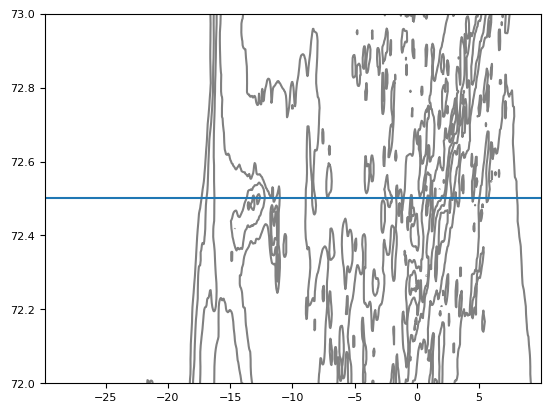

In [4]:
fig, ax = plt.subplots()
ax.contour(depth.X,depth.Y,depth, colors='Grey')
ax.plot(depth.X,[72.5 for Y in depth.X])
ax.set_ylim(72,73)

In [5]:
SA = df.S
SA = SA.sel(Y=72.5, method='nearest').sel(X=slice(-22,5))
TP = df.Temp
TP = TP.sel(Y=72.5, method='nearest').sel(X=slice(-22,5))
Si = od.dataset.Sigma0

In [6]:
bathymetry = -depth.sel(Y=72.5, method='nearest').sel(X=slice(-22,5))
bathymetry

<xarray.DataArray 'Depth' (X: 558)>
array([           nan,   -77.        ,  -147.87933415,  -217.61680399,
        -227.        ,  -208.        ,  -189.        ,  -189.        ,
        -204.53175433,  -208.        ,  -217.5       ,  -223.0098252 ,
        -227.        ,  -227.        ,  -227.        ,  -236.5       ,
        -255.5       ,  -280.17759223,  -303.        ,  -322.        ,
        -338.51904575,  -341.        ,  -341.        ,  -340.63338312,
        -337.29101649,  -336.5106833 ,  -339.43028933,  -350.5       ,
        -356.13677249,  -351.78237931,  -319.71355521,  -298.29221158,
        -259.01490701,  -227.        ,  -221.052594  ,  -217.5       ,
        -208.        ,  -208.        ,  -206.72300872,  -206.30591337,
        -206.45851144,  -207.84880803,  -217.5       ,  -217.5       ,
        -217.5       ,  -217.5       ,  -221.04145057,  -227.        ,
        -227.        ,  -236.5       ,  -241.57643473,  -244.11416598,
        -246.        ,  -257.355316  ,  -264.98157794,  -265.        ,
        -274.5       ,  -274.5       ,  -274.5       ,  -265.        ,
        -265.        ,  -265.        ,  -263.11563945,  -261.24322701,
        -259.45552821,  -257.72510831,  -255.85293211,  -255.5       ,
        -246.        ,  -246.        ,  -244.87281274,  -245.26271606,
        -246.        ,  -246.        ,  -255.5       ,  -255.74890046,
        -258.83607296,  -260.80890039,  -260.52060133,  -256.69473364,
...
       -2336.        , -2310.545555  , -2250.5       , -2060.5       ,
       -1836.6558602 , -1721.62811106, -1566.5       , -1690.        ,
       -1986.48154889, -2013.        , -2013.        , -1880.        ,
       -1880.        , -2026.66525928, -2032.        , -2007.84233597,
       -2013.        , -1956.        , -1861.        , -1528.5       ,
       -1440.04451772, -1642.5       , -1737.5       , -1747.        ,
       -1747.        , -1756.5       , -1794.5       , -1804.        ,
       -1861.        , -2048.68468242, -2070.        , -2069.72741774,
       -2051.        , -2145.71985868, -2442.05217818, -2640.        ,
       -2636.47133909, -2564.        , -2763.5       , -2773.        ,
       -2652.53754622, -2502.88777247, -2865.30196232, -3058.        ,
       -3057.65526843, -2829.91272979, -2766.70164387, -2564.        ,
       -2459.5       , -2535.5       , -2602.        , -2621.        ,
       -2615.41436841, -2561.16607642, -2197.31682828, -2165.        ,
       -2124.21644869, -2117.5       , -2089.        , -2222.        ,
       -2222.        , -2317.        , -2371.75112938, -2374.        ,
       -2364.5       , -2346.95102778, -2279.        , -2234.56521246,
       -2176.89959797, -2450.        , -2564.        , -2558.70677223,
       -2269.5       , -2165.        , -2136.5       , -2332.26209521,
       -2373.76519869, -2374.        ])
Coordinates:
  * X        (X) float64 -21.98 -21.93 -21.87 -21.82 ... 4.748 4.813 4.879 4.945
    Y        float64 72.5
    XC       (X) float64 -21.98 -21.93 -21.87 -21.82 ... 4.748 4.813 4.879 4.945
    YC       (X) float64 72.5 72.5 72.5 72.5 72.5 ... 72.5 72.5 72.5 72.5 72.5
Attributes:
    description:    fluid thickness in r coordinates (at rest)
    standard_name:  ocean_depth
    long_name:      ocean depth
    units:          m
    coordinate:     XC YC

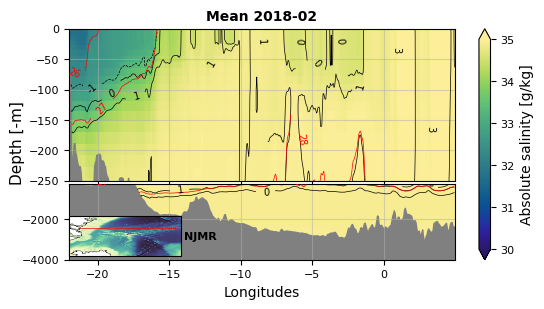

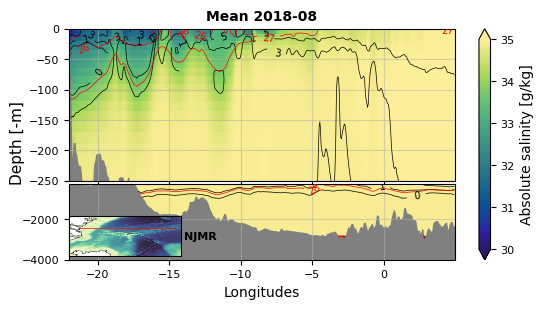

In [7]:
# Overview figure
for data in zip(SA,TP,Si):
    fig, ax = plt.subplot_mosaic([[0],[1]],
                                figsize=(6.2217,3), gridspec_kw={'height_ratios': [2/3, 1/3]}, sharex=True)
    fig.subplots_adjust(hspace=0.025)
    cmap = cmo.haline

    mesh = ax[0].pcolormesh(data[0].X,data[0].Z,data[0], cmap=cmap, vmin=30, vmax=35)
    ax[1].pcolormesh(data[0].X,data[0].Z,data[0], cmap=cmap, vmin=30, vmax=35)
    
    cbar = fig.colorbar(mesh, ax=[ax[0],ax[1]], extend='both')
    cbar.set_label('Absolute salinity [g/kg]')
    
    cntr1 = ax[0].contour(data[1].X,data[1].Z, data[1], [-1,0,1,3,5], colors='black', linewidths=0.5)
    cntr2 = ax[1].contour(data[1].X,data[1].Z, data[1], [-1,0,1,3,5], colors='black', linewidths=0.5)

    ax[0].clabel(cntr1, fmt="%2.0f", use_clabeltext=True,fontsize=7)
    ax[1].clabel(cntr2, fmt="%2.0f", use_clabeltext=True, fontsize=7)

    cntr1 = ax[0].contour(data[2].X,data[2].Z, data[2], [25,26,27,28], colors='red', linewidths=0.5)
    cntr2 = ax[1].contour(data[2].X,data[2].Z, data[2], [25,26,27,28], colors='red', linewidths=0.5)

    ax[0].clabel(cntr1, fmt="%2.0f", use_clabeltext=True,fontsize=7)
    ax[1].clabel(cntr2, fmt="%2.0f", use_clabeltext=True, fontsize=7)

    ax[0].fill_between(bathymetry.X,bathymetry,-4000, color='grey')
    ax[1].fill_between(bathymetry.X,bathymetry,-4000, color='grey')

    ax[1].set_xlabel('Longitudes')
    # Add a common y-axis label in the center of the figure
    fig.text(0.03, 0.5, 'Depth [-m]', va='center', rotation='vertical')
    ax[0].set_title(f'Mean {str(data[0].time.values)[:7]}',fontweight='bold')

    ax[1].annotate(text='NJMR',xy=[-14,-3000],fontsize=8,fontweight='bold')

    inset_ax = fig.add_axes([0.125, 0.065, 0.18, 0.25], projection=ccrs.PlateCarree())
    inset_ax.pcolormesh(depth.X, depth.Y, depth, cmap=cmo.deep, transform=ccrs.PlateCarree())
    inset_ax.plot(bathymetry.X,[bathymetry.Y for X in bathymetry.X],color='red',linewidth=0.5, transform=ccrs.PlateCarree())
    inset_ax.contour(depth_notZero.X,depth_notZero.Y,depth_notZero,[0],colors='black', linewidths=0.25, transform=ccrs.PlateCarree())
    inset_ax.set_extent([-25, 6, 65, 76], crs=ccrs.PlateCarree())

    ax[0].set_ylim(-250,0)
    ax[1].set_ylim(-4000,-250)
    ax[0].grid(alpha=0.5)
    ax[1].grid(alpha=0.5)

    fig.savefig(f'/nird/home/ekv036/MSc/Fig/Vertical/VerticalSA{str(data[0].time.values)[:7]}',dpi=300, facecolor='w', edgecolor='w',
            orientation='landscape', format=None,
            transparent=False, bbox_inches='tight',pad_inches=0.25)